## Import Libraries

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
import numpy as np
import geopandas as gpd
import xarray as xr

## import the data

In [54]:
cmip_file = 'data/xarray_example/agg_macav2metdata_pr_CCSM4_r6i1p1_rcp85_2006_2099_CONUS_monthly.nc'
sim3 = 'data/xarray_example/agg_macav2metdata_pr_CanESM2_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc'
sim4 = 'data/xarray_example/agg_macav2metdata_pr_bcc-csm1-1-m_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc'
sim5 = 'data/xarray_example/agg_macav2metdata_pr_bcc-csm1-1_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc'
sim1 = 'data/xarray_example/agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc'


In [55]:
# precip data
ds_pr = xr.open_dataset(cmip_file)
ds_pr

<xarray.Dataset>
Dimensions:        (time: 1128, lat: 49, lon: 73)
Coordinates:
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat            (lat) float64 46.48 46.52 46.56 46.6 ... 48.4 48.44 48.48
  * lon            (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.5 245.5
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...

In [56]:
ds_pr['precipitation']

<xarray.DataArray 'precipitation' (time: 1128, lat: 49, lon: 73)>
[4034856 values with dtype=float32]
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

Text(0, 0.5, 'Mean Monthly Precipitaiton [mm]')

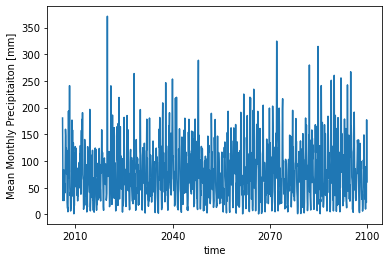

In [57]:
# average precip over lake courdelane watershed
# mean_monthly_precip = ds_pr['precipitation'].mean(dim = ('lat', 'lon')).values
# plt.plot(mean_monthly_precip)
ax1 = ds_pr['precipitation'].mean(dim = ('lat', 'lon')).plot()
plt.ylabel('Mean Monthly Precipitaiton [mm]')

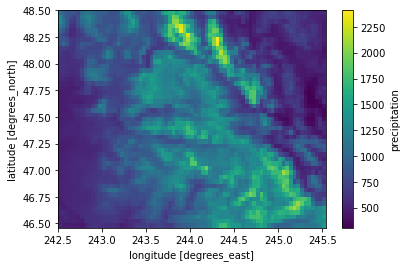

In [58]:
ds_pr['precipitation'].groupby('time.year').sum(dim = 'time').mean(dim = 'year').plot()

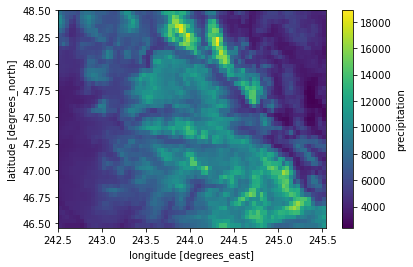

In [59]:
ds_pr['precipitation'].groupby('time.month').sum(dim = 'time').mean(dim = 'month').plot()

In [60]:
ds_pr = xr.open_dataset(cmip_file)
ds_pr['precipitation']

<xarray.DataArray 'precipitation' (time: 1128, lat: 49, lon: 73)>
[4034856 values with dtype=float32]
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat      (lat) float64 46.48 46.52 46.56 46.6 ... 48.35 48.4 48.44 48.48
  * lon      (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.4 245.5 245.5
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

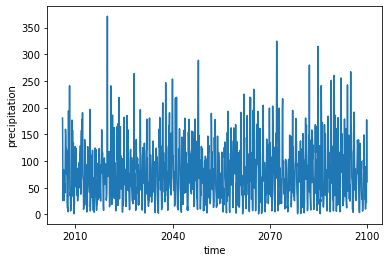

In [61]:
mean_mon_precip = ds_pr['precipitation'].mean(dim = ('lat' , 'lon' )).plot()

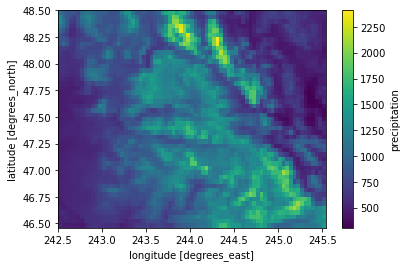

In [62]:
ds_pr['precipitation'].groupby('time.year').sum( dim = 'time').mean(dim = 'year').plot()

Text(0, 0.5, 'Mean Monthly Precipitation [mm]')

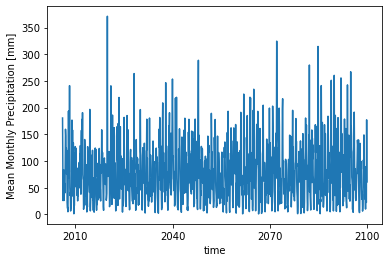

In [63]:
ds_pr['precipitation'
    ].mean( dim = ( 'lat' , 'lon' ) 
    ).plot()
plt.ylabel('Mean Monthly Precipitation [mm]')

In [64]:
ds_pr['precipitation'].groupby('time.year'
    ).mean( dim = ('lat' , 'lon'))

<xarray.DataArray 'precipitation' (time: 1128)>
array([180.56999 ,  92.50667 ,  25.919336, ...,  22.489206, 177.12263 ,
        60.851303], dtype=float32)
Coordinates:
  * time     (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00

In [65]:
ds_pr['precipitation'].mean( dim = ('lat' , 'lon')).groupby('time.year')

DataArrayGroupBy, grouped over 'year'
94 groups with labels 2006, 2007, 2008, ..., 2098, 2099.

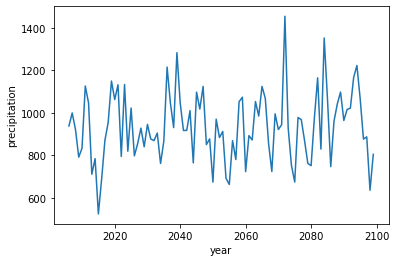

In [67]:
ds_pr['precipitation'].groupby('time.year'
    ).sum(dim = 'time'
    ).mean( dim = ('lat' , 'lon')
    ).plot()